# CT5170: Principles of ML - Assignment 2
## Course code: 1MAO3
### Participants (name: id): (Daniel Verdejo: 22240224, Thomas Cronin: 22239435)

# Report

As we are doing this assignment in a pair we chose to split the work based on complexity:
(Data Exploration/Clean-up, metric creations, Perceptron)'s work load is equal to the Multi Layer Perceptron work load.
As such we decided that Tom would do the Perceptron, Data and metrics and Danny would do the Multi Layer Perceptron
* Note: The metrics is the creation of the scoring algorithm, not the metrics for an algorithm as such we calculate our own metrics for our own algorithm using the helper metrics

### Data Exploration and Clean-up
##### Tom's Work
A helper function was created to load the dataset into a pandas DataFrame; this function ‘read_data_return_dataframe’ takes a string containing the path to a txt file. It reads the dataset via pandas.read() and returns the DataFrame containing the data.

Exploring the data showed the ranges and statistical data, while being quite distinct from each other and all in a usable state, would require normalisation. The ‘fire’ column, however, did not look correct; it contained eight unique entries for what should have been two individual entries, ‘yes’ or ‘no’. It seemed like the data was being read with questionable spaces giving them, as far as panda DataFrames are concerned, unique entries. To replace the entries, a convert_label function was implemented to replace a specified binary value with a different binary value. This allowed the change from ‘yes/no’ to ‘1/0’ while also replacing duplicate entries.

The dataset is imbalanced, slightly skewed to the positive case ‘yes’. There are 97 ‘no’ and 107 ‘yes’.

To normalise the data, the helper function Normalize was implemented to normalise all the data to 0-1 ranges. It takes a DataFrame and a list of features, returning a DataFrame of the normalised value of each entry in each feature column.
### Metrics
#### Tom's Work
### Algorithms
#### Perceptron Algorithm
##### Tom's Work
<u>Design Decisions:</u>
* I choose not to include a bias modification for the perceptron as it would not be needed to hopefully get a high accuracy on this dataset, based on the data exploration.

* This Perceptron will be needed to both classify in binary, as-well as non-binary outputs, so it is possible to specify one of three activations functions as a parameter ('ReLU', 'heaviside' and 'sigmoid') and the perceptron will use its own implementation of the specified activation function.

* The perceptron initiates the weights if not specified between random values of (-0.5, 0.5) after researching the algorithm this was deemed a suitable weight range. It is also possible to pass predefined weights to the nueron.

* For the sigmoid activation function it was decided that a summed weights=0, which in sigmoid would return a 0.5 would still be a positive case and would activate the perceptron with a 1.

<u>Algorithm Design</u>
*   Pseudo Code:

        ThresholdLogicUnit()

            Learning Rate = Input()
            Input Weights = Initialised Randomly or Input
            Activation Functions = Heaviside or Input

            fit()
                Training Set = Input()
                Labels = Input() or None
                Learning Iterations = Input or 200

                for each iteration:
                    predict value on inputs
                    compare predictions with results
                    if prediction is wrong update weights:
                        new weights = weighs -  value of learning rate multiplied by (prediction - label) multiplied by input

            predict()
                samples = Input
                for each sample predict a score
                return a list of the predictions

* Description:

    The Perceptron Algorithm:
        The Threshold Logic Unit takes in n_dimentional data and there corresponding 1_dimentional array of labels. It requires a learning rate, which is used to tune the changing of the weights values. After getting the data and labels, the weights for the amount of features in a sample (the input shape) is initialised  randomly between values of -0.5,+0.5 (note: these can be set aswell). The Threshold Logic Unit then loops for the amount of iterations it should run and trains on each sample. During the training process it will predict a score using the specified activation function. If the score is not equal to the coresponding label, the weights are updated by subtracting the current weights with the learning rate * error * the input. Once the TLU has completed its training, we can then pass it an unseen sample and get a prediction.
#### Multi Layer Perceptron Algorithm
##### Danny's Work

### Test's and Result's
#### Perceptron
##### Tom's Work
#### Multi Layer Perceptron
### Conclusion and observations
##### Tom and Danny's Conclusions and observaitons



# Implementation

In [1]:
import pandas as pd
import numpy as np
from seaborn import pairplot
from Utils import *
from Metrics import *

from ThresholdLogicUnit import ThresholdLogicUnit

from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split


### Data Exploration

In [2]:
# Tom Cronin
loaded_data_frame = read_data_return_dataframe("../wildfires.txt") # Loads The wildfire Dataset
wildfires_df = loaded_data_frame.copy() # copys the data so we don't mess with the original dataset

print(wildfires_df.shape) # gets the dimensions of the dataframe
print("-" * 20)
print(wildfires_df.columns) # gets the features of the columns
print("-" * 20)
print(wildfires_df.dtypes) # returns the datatypes
print("-" * 20)
print(wildfires_df.describe(include='all'))

(204, 10)
--------------------
Index(['fire', 'year', 'temp', 'humidity', 'rainfall', 'drought_code',
       'buildup_index', 'day', 'month', 'wind_speed'],
      dtype='object')
--------------------
fire              object
year               int64
temp               int64
humidity           int64
rainfall         float64
drought_code     float64
buildup_index    float64
day                int64
month              int64
wind_speed         int64
dtype: object
--------------------
          fire         year        temp    humidity    rainfall  drought_code  \
count      204   204.000000  204.000000  204.000000  204.000000    204.000000   
unique       8          NaN         NaN         NaN         NaN           NaN   
top     yes             NaN         NaN         NaN         NaN           NaN   
freq       101          NaN         NaN         NaN         NaN           NaN   
mean       NaN  2011.975490   31.906863   62.279412    0.823529     48.537647   
std        NaN     3.320987  

#### Error in fire label?
It seems that the fire label is a mix of 'no' and 'yes' however there are different spaces causing the dataframe to think there are multiple entries, 8 instead of 2. Let's fix that

In [3]:
# Tom
ndarray = wildfires_df['fire'].copy() # gets the fire column
for index in range(len(ndarray)):   # loops through each entry
    if 'no' in ndarray[index].lower():
        ndarray[index] = "NO"   # sets label to No
    elif 'yes' in ndarray[index].lower():
        ndarray[index] = "YES" # sets label to yes
wildfires_df['fire'] = ndarray
labels_copy_df = wildfires_df['fire'].copy()
wildfires_df.describe(include='all')

,fire,year,temp,humidity,rainfall,drought_code,buildup_index,day,month,wind_speed
count,204,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2011.975490,31.906863,62.279412,0.823529,48.537647,16.542304,15.691176,7.553922,16.446078
std,NaN,3.320987,3.814175,15.209388,2.117959,49.133366,14.634994,8.907722,1.196067,3.098074
min,NaN,2007.000000,22.000000,21.000000,0.000000,7.180000,1.320000,1.000000,6.000000,6.000000
25%,NaN,2009.000000,29.000000,52.750000,0.000000,10.627500,6.067500,8.000000,6.000000,14.750000
50%,NaN,2012.000000,32.000000,63.000000,0.000000,30.550000,11.535000,15.500000,8.000000,16.000000
75%,NaN,2015.000000,35.000000,74.250000,0.600000,62.367500,22.665000,24.000000,9.000000,18.000000


Fire is now a binary class

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'temp'}>,
        <AxesSubplot:title={'center':'humidity'}>],
       [<AxesSubplot:title={'center':'rainfall'}>,
        <AxesSubplot:title={'center':'drought_code'}>,
        <AxesSubplot:title={'center':'buildup_index'}>],
       [<AxesSubplot:title={'center':'day'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'wind_speed'}>]], dtype=object)

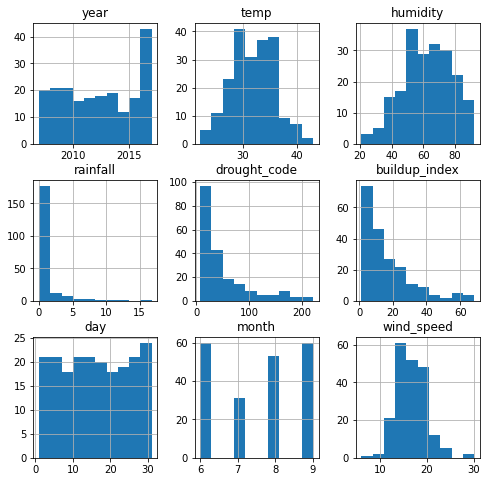

In [4]:
# Tom Cronin
# Lets Look at the data graphically
wildfires_df.hist(figsize=(8, 8))

In [5]:
# Tom Cronin
# Lets Look at the data graphically

# plot = pairplot(data=normalised_data, hue="fire", diag_kind="hist", corner=True, height=1.5)

In [9]:
    wildfires = read_data_return_dataframe("../wildfires.txt")
    # Copy to be used for the rest of the assignment
    wildfires_copy = wildfires.copy()
    wildfires_copy = convert_label(wildfires,
                                                  'fire',
                                                  ['no', 'yes'],
                                                  ['NO', 'YES'])
    wildfires_labels = wildfires_copy.copy()['fire']
    wildfires_copy.drop('fire', axis=1, inplace=True)

    ndarray = wildfires_labels.copy()
    for index in range(len(ndarray)):
        if 'no' in ndarray[index].lower():
            ndarray[index] = 0
        elif 'yes' in ndarray[index].lower():
            ndarray[index] = 1
    wildfires_labels = ndarray

    features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']
    X_train, X_test, y_train, y_test = train_test_split(wildfires_copy, wildfires_labels, test_size=0.1,
                                                        random_state=42)
    print(X_train)
    X_train = X_train[features].values  # returns a numpy NdArray of the features
    X_test = X_test[features].values  # returns a numpy NdArray of the features
    print(X_train)
    X_train = Normalize(X_train, features)
    X_test = Normalize(X_test, features)

    X_train = np.asarray(X_train)
    y_train = np.asarray(y_train)

    print(X_train)


    perceptron = ThresholdLogicUnit(learning_rate=0.1, activation_function='sigmoid')
    perceptron.fit(X_train,y_train, learning_iterations=200)

    predictions = perceptron.predict(np.asarray(X_test))
    print(predictions)
    print("Accuracy: ", accuracy(predictions, y_test.values))
    print("Precision: ", precision(predictions, y_test.values))
    print("Recall: ", recall(predictions, y_test.values))
    print("F1 Score: ", f1_score(predictions, y_test.values))


0          NO
1          NO
2          NO
3          NO
4          NO
        ...  
199    yes   
200     no   
201     no   
202     no   
203    no    
Name: fire, Length: 204, dtype: object
0          NO
1          NO
2          NO
3          NO
4          NO
        ...  
199    yes   
200     no   
201     no   
202     no   
203    no    
Name: fire, Length: 204, dtype: object
0          NO
1          NO
2          NO
3          NO
4          NO
        ...  
199    yes   
200     no   
201     no   
202     no   
203    no    
Name: fire, Length: 204, dtype: object
0          NO
1          NO
2          NO
3          NO
4          NO
        ...  
199    yes   
200     no   
201     no   
202     no   
203    no    
Name: fire, Length: 204, dtype: object
0          NO
1          NO
2          NO
3          NO
4          NO
        ...  
199    yes   
200     no   
201     no   
202     no   
203    no    
Name: fire, Length: 204, dtype: object
0          NO
1          NO
2      

In [7]:
features = ['year', 'temp', 'humidity', 'rainfall', 'drought_code', 'buildup_index', 'day', 'month', 'wind_speed']

X_train, X_test, y_train, y_test = train_test_split(wildfires_df, wildfires_labels, test_size=0.1,                                        random_state=42)
X_train = X_train[features].values  # returns a numpy NdArray of the features
X_test = X_test[features].values  # returns a numpy NdArray of the features
X_train = Normalize(X_train, features)
X_test = Normalize(X_test, features)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)



### Perceptron Algorithm
For sake of clarity and shortness of this file, the perceptron was implemented as a ThresholdLogicUnit in a seperate file. Can be found in the zip

In [8]:
perceptron = ThresholdLogicUnit(learning_rate=0.001, activation_function='heaviside')
perceptron.fit(X_train, y_train)
predictions = perceptron.fit(X_test)

TypeError: 'NoneType' object is not iterable